<img src="https://www.ikiam.edu.ec/img/logo-ikiam-grey.png" width=300 height=240 />

# EXAMEN PARCIAL PYTHON
    

## GBI6-2021II: BIOINFORMÁTICA

**Apellidos, Nombres** <--- CAMBIE POR LOS QUE CORRESPONDA A SUS DATOS

**18-02-2021**

<font color='red'>NO AGREGUE NUEVAS CELDAS, UTILICE ÚNICAMENTE LAS QUE ESTÁN CREADAS</font>


### REQUERIMIENTOS PARA EL EXAMEN
Para este examen se requiere dos documentos: 

1. Archivo ```miningscience.py``` donde tendrá dos funciones:

2. Archivo ```2021II_GBI6_ExamenParcialPython``` donde se llamará las funciones y se obtendrá resultados.

## Ejercicio 1 [2 puntos]
Cree el archivo ```miningscience.py``` con las siguientes dosfunciones:
    
i. ```download_pubmed```: para descargar la data de PubMed utilizando el **ENTREZ** de Biopython. El parámetro de entrada para la función es el ```keyword```. 
    
ii. ```mining_pubs```: esta función debe utilizar el módulo **re** y utilizar el párametro ```tipo``` para realizar lo siguiente:
        
* Si el tipo es "DP" recupera el año de publicación del artículo. El retorno es un *dataframe* con el **PMID** y el **DP_year**.
      
* Si el tipo es "AU" recupera el número de autores por **PMID**. El retorno es un *dataframe* con el **PMID** y el **num_auth**. 
      
* Si el tipo es "AD" recupera el conteo de autores por país. El retorno es un *dataframe* con el **country** y el **num_auth**. 

* *Puede utilizar un ```if``` dentro de la función.* 

* *Cree un docstring para cada función.* 

Luego de crear las funciones, cargue el módulo ```miningscience``` como ```msc``` e imprima docstring de cada función.




In [2]:
%reload_ext autoreload
%autoreload 2
import importlib
import miningscience
importlib.reload(miningscience)
import miningscience as msc


print("Descripcion de la Funcion #1 ")
help(msc.download_pubmed)
print("Descripcion de la Funcion #2")
help(msc.mining_pubs)

Descripcion de la Funcion #1 
Help on function download_pubmed in module miningscience:

download_pubmed(keyword)

Descripcion de la Funcion #2
Help on function mining_pubs in module miningscience:

mining_pubs(tipo)




## Ejercicio 2 [1 punto]


Utilice la función ```download_pubmed``` para descargar la data con el keyword ```Ecuador proteomics``` e imprima lo siguiente: 

```python
'El número de artículos es: xx' # xx corresponde al número de artículos recuperados

'El PMID del primer artículo es: xxxxxxxx' # xxxxxxxx corresponde al ID del artículo en PUDMED

```

In [3]:
# Escriba aquí su código para el ejercicio 2
Articulos = msc.download_pubmed('Ecuador genomics')  
print('El número de artículos es: '+       Articulos['RetMax'])    
print('El PMID del primer artículo es: '+  Articulos['IdList'][0])


El número de artículos es: 190
El PMID del primer artículo es: 35121084


## Ejercicio 3 [1 punto]

Utilice la función ```mining_pubs``` para crear los siguientes dataframes: 

* pub_year

* pub_authors

* coutries

Muestre los dos primeros y los dos últimos registros de cada dataframe. 

In [4]:
# Escriba aquí su código para el ejercicio 3

#Creando las DataSets 
pub_year = msc.mining_pubs('DP')
coutries = msc.mining_pubs('AD')
pub_authors = msc.mining_pubs('AU') 

print('Primeros y Ultimos dos registros de el dataset pub_year')
display(pub_year.head(2)) 
display(pub_year.tail(2))

print('Primeros y Ultimos dos registros de el dataset pub_authors')
display(pub_authors.head(2))
display(pub_authors.tail(2))

print('Primeros y Ultimos dos registros de el dataset coutries')
display(coutries.head(2))
display(coutries.tail(2))


Primeros y Ultimos dos registros de el dataset pub_year


,Pmid,DpYear
0,35120121,2022 Feb
1,35064679,2022 Jan 22


,Pmid,DpYear
53,19844075,2010
54,19018989,2008 Sep


Primeros y Ultimos dos registros de el dataset pub_authors


,Pmid,NrAutor
0,35120121,14
1,35064679,7


,Pmid,NrAutor
51,24823669,8
52,24342523,2


Primeros y Ultimos dos registros de el dataset coutries


,Country,NrAutor
0,United States,14
1,England,7


,Country,NrAutor
52,England,2
53,Switzerland,7


## Ejercicio 4 [2 puntos]

Realice la visualización de los datos del ejercicio 3. 

* ```pubyear```: utilizando el conteo artículos por año, calcule la media y la desviación estandar (asumiendo que la distribución es normal). Realice un gráfico de la distribución normal de sus datos. Coloque el título, leyenda de los ejes "x" e "y", y la leyenda de la curva (utilice las expresiones matemáticas tipos latex de ser necesario). 

* ```pub_authors```: realice un boxplot del conteo de autores por artículo. Coloque las leyendas adecuadas para cada eje y el título.  

* ```countries```: realice una nube de puntos (adaptación de su tarea), resalte al menos 3 países con flechas. Coloque las leyendas adecuadas para cada eje y el título. 


La media es de 4.583333333333333 con una desviacion estandar de 4.581749037477309


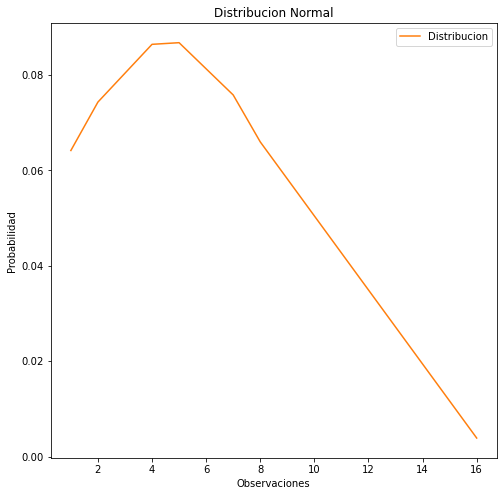

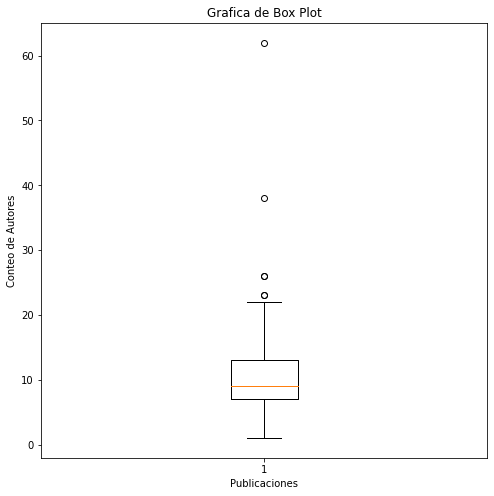

    country   latitude  longitude           name
40       CH  46.818188   8.227512    Switzerland
53       DE  51.165691  10.451526        Germany
162      NL  52.132633   5.291266    Netherlands
227      US  37.090240 -95.712891  United States


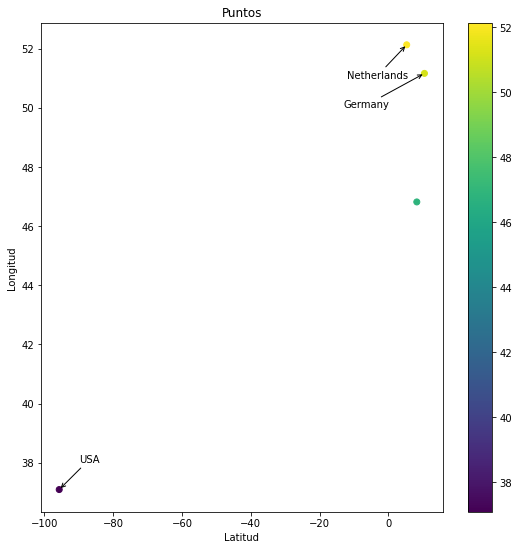

In [5]:
# Escriba aquí su código para el ejercicio 4
#importamos los librerias 
import matplotlib.pyplot as plt 
import matplotlib as mpl
from scipy.stats import norm 
import numpy as np 
import statistics 
import pandas as pd

pub_year['Autores'] = pd.to_datetime(pub_year['DpYear'], infer_datetime_format=True)

FechasLista =  pub_year['Autores'].dt.strftime('%Y')

FechasLista =  pd.DataFrame(FechasLista, columns = ['Autores'])
FechasLista =  pd.DataFrame(FechasLista["Autores"].value_counts())
FechasFiltro = pd.DataFrame(FechasLista.rename_axis(columns="DpYear"))

#MEDIA Y DESVIACION ESTANDAR
DesviacionEstandar = FechasFiltro.Autores.std()
CalculoMedia =       FechasFiltro['Autores'].mean()
ListaDatos=          list(FechasFiltro['Autores'])

fig, axu = plt.subplots(figsize=(10, 10))
x_axis=    list(FechasFiltro['Autores'])
axu.set_title('Distribucion Normal')
Grafico1, = axu.plot(x_axis, norm.pdf(ListaDatos, CalculoMedia, DesviacionEstandar), 'C1', label='Distribucion')
plt.xlabel("Observaciones")
plt.ylabel("Probabilidad")
axu.legend(handles=[Grafico1])
GraficaParametros = plt.gcf()
plSize = GraficaParametros.get_size_inches()
GraficaParametros.set_size_inches( 8, 8)

print("La media es de "+ str(CalculoMedia)+" con una desviacion estandar de "+ str(DesviacionEstandar))
#FIGURA NR 2
GraficaCountries=list(pub_authors['NrAutor'])
fig = plt.figure(figsize =(8, 8)) 
plt.title("Grafica de Box Plot")
plt.xlabel("Publicaciones")
plt.ylabel("Conteo de Autores")
plt.boxplot(GraficaCountries)
plt.show()
#LONGITUDES Y LATITUDES
ListaContinentes = coutries['Country'].tolist()
ListaFiltrada = list() 
for continente in ListaContinentes:
    if continente not in ListaFiltrada:
        ListaFiltrada.append(continente)  
#EXPORTACION DEL CSV COUNTRIES PARA LA OBTENCION DE LATITUDES Y LONGITUDES     
Latidud = pd.read_csv('./data/countries.csv', engine='python')
DataFinal = Latidud[Latidud.name.isin(ListaFiltrada)]
print(DataFinal)
#CREACION GRAFICA 3
plt.scatter(DataFinal.longitude, DataFinal.latitude, c=DataFinal.latitude)
plt.colorbar()
#NOMBRE PAISES
ard = dict(arrowstyle="->")
plt.annotate('USA', xy = (-95.712891, 37.09024),xytext = (-90, 38), arrowprops = ard)
plt.annotate('Netherlands', xy = (5.291266, 52.132633),xytext = (-12, 51), arrowprops = ard)
plt.annotate('Germany', xy = (10.451526 , 51.165691),xytext = (-13, 50), arrowprops = ard)
#CREACION DE ETIQUETAS
plt.title("Puntos")
plt.xlabel("Latitud")
plt.ylabel("Longitud")

GraficaParametros = plt.gcf()
plSize = GraficaParametros.get_size_inches()
GraficaParametros.set_size_inches( 9, 9 )


## Ejercicio 5 [1 punto]

Interprete los resultados del **ejercicio 4**

### Escriba la respuesta del ejercicio 5


## Ejercicio 6 [2 puntos]

Para algún gen de interés, realice lo siguiente: 

1. Una búsqueda en la página del [NCBI nucleotide](https://www.ncbi.nlm.nih.gov/nucleotide/).

2. Descargue el ```Accession List``` de su búsqueda.

3. Cargue el ```Accession List``` en este notebook y haga una descarga de la data tipo ```genbank``` utilizando los diez primeros IDs de accesión. 

4. Arme un árbol filogenético para los resultados del paso 3.

5. Interprete el árbol del paso 4. 

**Escriba aquí la interpretación del árbol**

## Ejercicio 7 [1 punto]


1. Cree en GitHub un repositorio de nombre ```GBI6_ExamenPython```. 
2. Cree un archivo ```Readme.md``` que debe tener lo siguiente: 
- Datos personales
- Características del computador
- Versión de Python/Anaconda y de cada uno de los módulos/paquetes y utilizados
- Explicación de la data utilizada

3. Cree un directorio de nombre ```data``` donde deben estar guardado la data utilizada 
4. Realice al menos 1 control de la versión (commits) por cada ejercicio (del 1 al 6), con un mensaje que inicie como: 

```sh 
Carlitos Alimaña ha realizado .....  
```